In [1]:
!pip install pandas
!pip install seaborn
!pip install scipy
!pip install numpy
from scipy.stats import norm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
out1=pd.read_csv("output_csv.csv")
out2=pd.read_csv("output2_csv.csv")
out3=pd.read_csv("output3_csv.csv")
out4=pd.read_csv("output4_csv.csv")
out5=pd.read_csv("output5_csv.csv")


In [3]:
df=pd.concat([out1,out2,out3,out4,out5])

In [4]:
df.columns
print(df[[' Postgres Bulk',' Mysql Batch','Total Elapsed']])

      Postgres Bulk   Mysql Batch  Total Elapsed
0              1000          1000     482.044230
1              1000          1000     477.787220
2              1000          1000     496.656303
3              1000          1000     483.033131
4              1000          1000     459.836543
..              ...           ...            ...
175          100000        100000     494.039513
176          100000        100000     502.991980
177          100000        100000     491.177663
178          100000        100000     495.826219
179          100000        100000     472.210788

[360 rows x 3 columns]


In [5]:
grouped=df.groupby([' Postgres Bulk',' Mysql Batch'])['Total Elapsed']
print(grouped)
grouped_mean=grouped.mean()

In [6]:
# Reset index to convert the series into a DataFrame for the heatmap
grouped_mean = grouped_mean.reset_index()
# grouped_mean.sort_values(['Total Elapsed'])
# grouped_mean

In [7]:

pivot_table = grouped_mean.pivot(columns=' Mysql Batch', index=' Postgres Bulk', values='Total Elapsed')


In [8]:
grouped=grouped.agg(['mean', 'std', 'count']).reset_index()


In [9]:
grouped

,Postgres Bulk,Mysql Batch,mean,std,count
0,1000,1000,479.705610,13.583108,10
1,1000,5000,505.110983,20.440527,10
2,1000,10000,501.344574,17.045164,10
3,1000,20000,510.790959,23.944992,10
4,1000,50000,526.710271,25.821831,10
5,1000,100000,569.854614,25.872383,10
6,5000,1000,460.869281,16.106642,10
7,5000,5000,477.188174,22.160066,10
8,5000,10000,468.163726,15.252821,10
9,5000,20000,489.321533,26.441124,10


In [10]:
# Function to calculate the 95% confidence interval using the normal distribution
from scipy.stats import norm
def confidence_interval(row):
    ci_half_width = norm.ppf(0.98) * (row['std'] / np.sqrt(row['count']))
    return (row['mean'] - ci_half_width, row['mean'] + ci_half_width)

# Apply the function to calculate the confidence interval
grouped['conf_interval'] = grouped.apply(confidence_interval, axis=1)

# Calculate the margin of error (half the range of the confidence interval)
grouped['error_margin'] = (grouped['conf_interval'].apply(lambda x: x[1] - x[0]) / 2)

# Display the results
grouped[['mean', 'conf_interval', 'error_margin']].sort_values(['mean']).head(10)


,mean,conf_interval,error_margin
18,423.041646,"(411.52124497101835, 434.5620473225302)",11.520401
20,426.885169,"(414.77666642849675, 438.99367239291433)",12.108503
19,427.366808,"(412.44593915386787, 442.2876770551623)",14.920869
30,435.739117,"(423.6323646334402, 447.8458684178599)",12.106752
31,436.297564,"(425.20122832378235, 447.3938990203491)",11.096335
24,437.455396,"(422.628314533984, 452.28247838898966)",14.827082
14,440.056638,"(427.4931209801366, 452.6201548816035)",12.563517
33,440.939562,"(432.86882298208894, 449.01030061028774)",8.070739
12,443.685185,"(433.72078358603136, 453.6495870404182)",9.964402
32,446.100400,"(439.85670856097255, 452.3440919055649)",6.243692


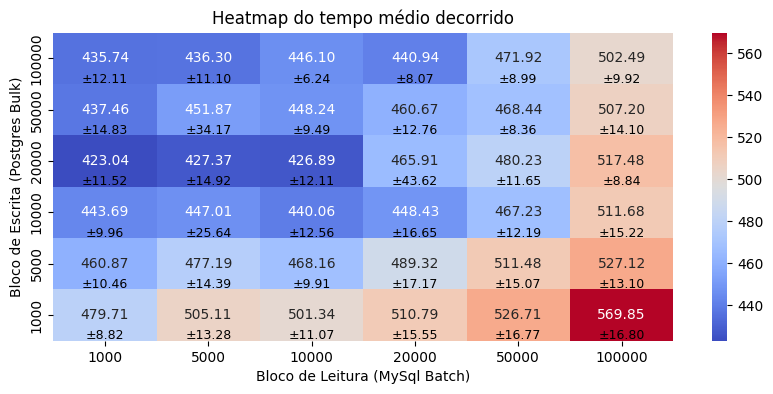

In [19]:
pivot_mean = grouped.pivot(columns=' Mysql Batch', index=' Postgres Bulk', values='mean')
pivot_error = grouped.pivot(columns=' Mysql Batch', index=' Postgres Bulk', values='error_margin')


# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(pivot_mean, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap do tempo médio decorrido')
# ax = plt.axes()
plt.xlabel("Bloco de Leitura (MySql Batch)")
plt.ylabel("Bloco de Escrita (Postgres Bulk)")

for (i, j), val in np.ndenumerate(pivot_mean):
    em = pivot_error.iloc[i, j]  # Error margin value
    plt.text(j + 0.5, i + 0.1, f'±{em:.2f}', ha='center', va='center', color='black', fontdict={'size': 9})
    
plt.gca().invert_yaxis()
plt.savefig('heatmap2.png')

In [12]:
tpch10=pd.read_csv("outputtpch10.csv")

In [13]:
grouped_tpch10=tpch10.groupby([' Postgres Bulk',' Mysql Batch'])['Total Elapsed']

In [14]:
grouped_tpch10=grouped_tpch10.agg(['mean', 'std', 'count'])

In [15]:
grouped_tpch10

,,mean,std,count
Postgres Bulk,Mysql Batch,,,
20000,1000,5393.61946,932.039043,15


In [16]:
# Apply the function to calculate the confidence interval
grouped_tpch10['conf_interval'] = grouped_tpch10.apply(confidence_interval, axis=1)

# Calculate the margin of error (half the range of the confidence interval)
grouped_tpch10['error_margin'] = (grouped_tpch10['conf_interval'].apply(lambda x: x[1] - x[0]) / 2)

# Display the results
grouped_tpch10[['mean', 'conf_interval', 'error_margin']]

,,mean,conf_interval,error_margin
Postgres Bulk,Mysql Batch,,,
20000,1000,5393.61946,"(4899.381814906559, 5887.857104955552)",494.237645
